In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from IPython.display import display, HTML

In [2]:
data = pd.read_csv('heart.csv')
print("Kích thước tập dữ liệu:", data.shape)

Kích thước tập dữ liệu: (918, 12)


In [3]:
print("\nThông tin các cột:")
print(data.info())
print("\n5 dòng đầu tiên:")
print(data.head())


Thông tin các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

5 dòng đầu tiên:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172 

In [4]:
print("Kiểm tra giá trị thiếu:")
print(data.isnull().sum())

Kiểm tra giá trị thiếu:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [5]:
print("Thống kê mô tả:")
print(data.describe())

Thống kê mô tả:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  



Phân phối của biến HeartDisease:
HeartDisease
1    508
0    410
Name: count, dtype: int64


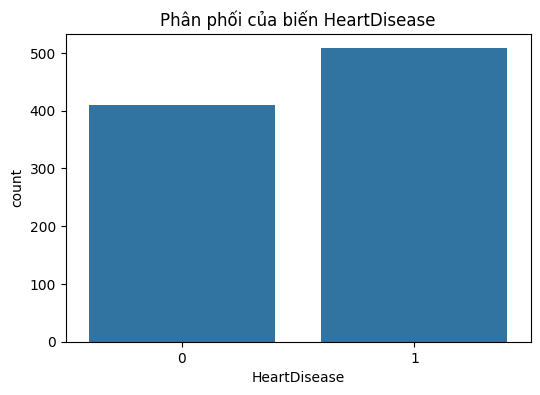

In [6]:
print("\nPhân phối của biến HeartDisease:")
print(data['HeartDisease'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=data)
plt.title('Phân phối của biến HeartDisease')
plt.show()

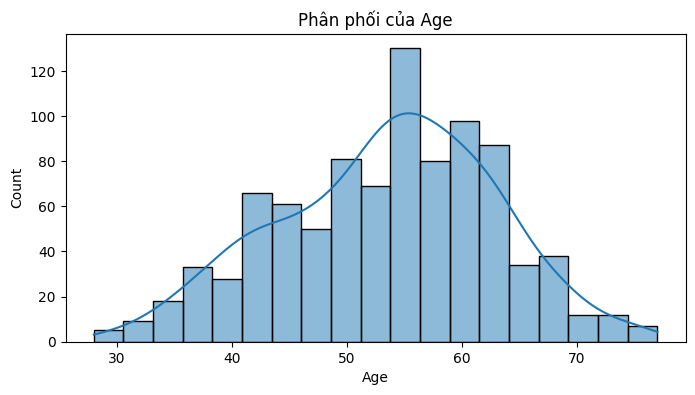

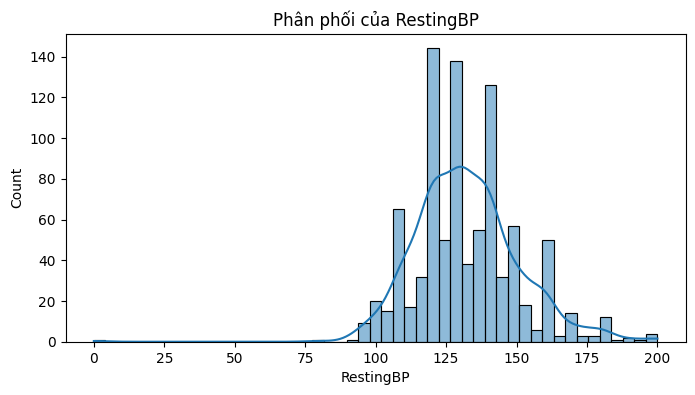

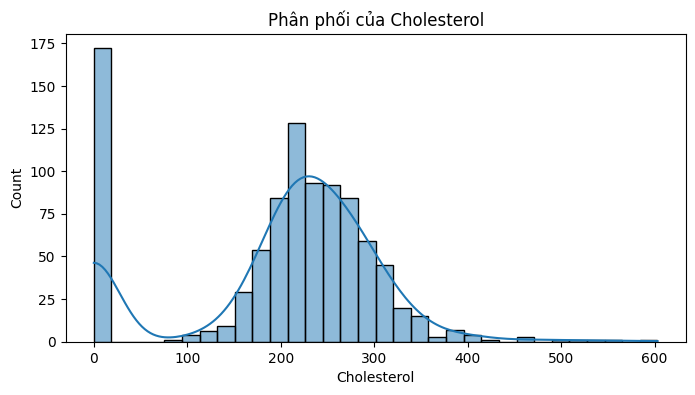

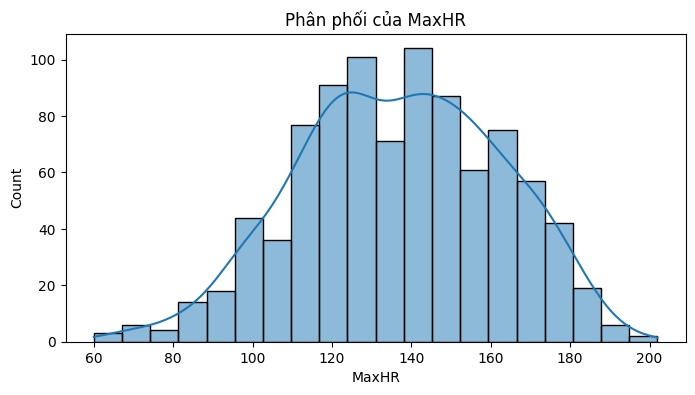

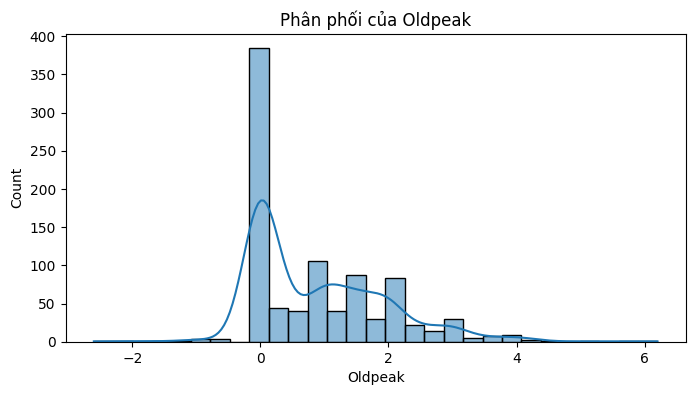

In [7]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Phân phối của {col}')
    plt.show()

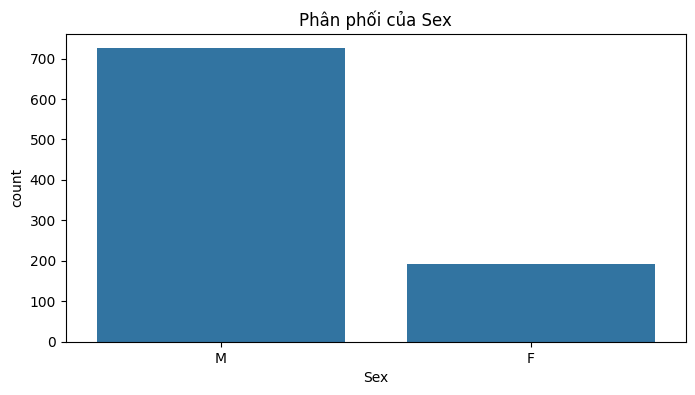

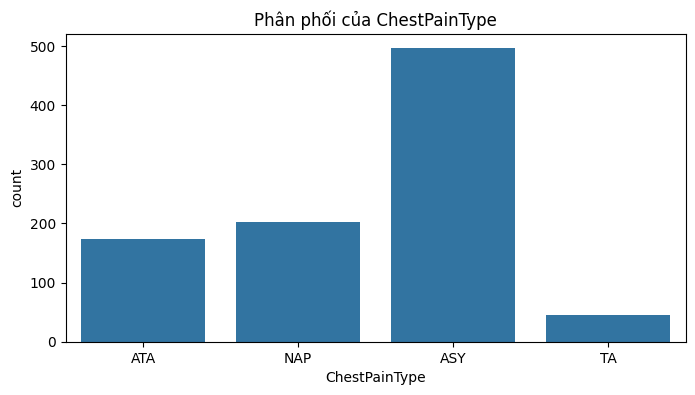

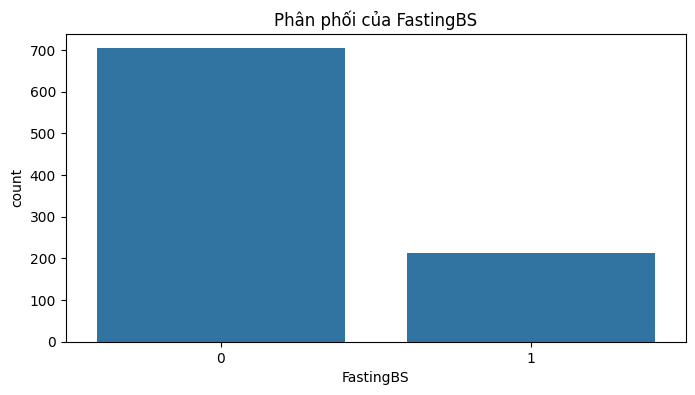

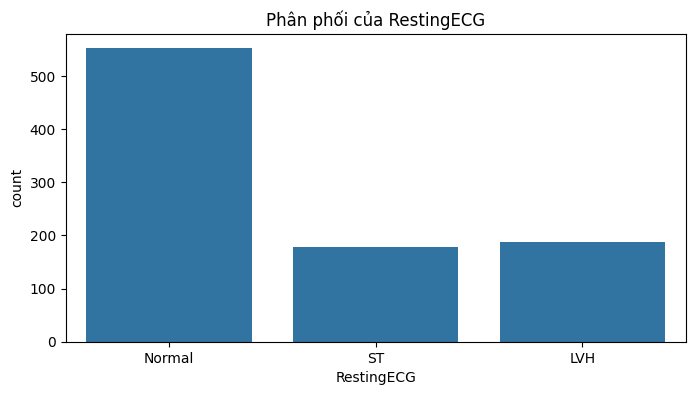

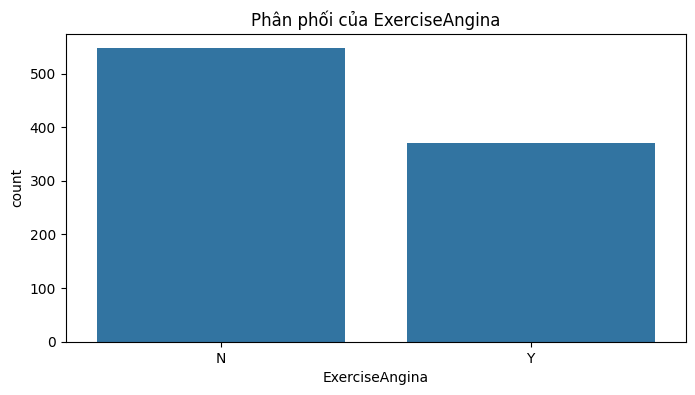

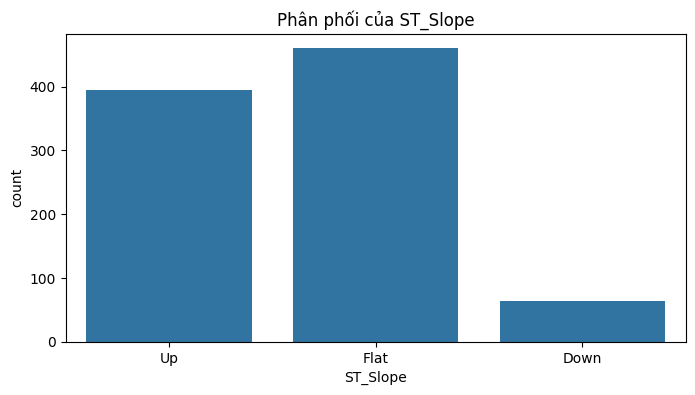

In [8]:
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Phân phối của {col}')
    plt.show()

In [9]:
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
print("\nDữ liệu sau khi mã hóa biến phân loại:")
print(data.head())


Dữ liệu sau khi mã hóa biến phân loại:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [10]:
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
print("\nDữ liệu sau khi chuẩn hóa đặc trưng số:")
print(data.head())


Dữ liệu sau khi chuẩn hóa đặc trưng số:
        Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0 -1.433140    1              1   0.410909     0.825070          0   
1 -0.478484    0              2   1.491752    -0.171961          0   
2 -1.751359    1              1  -0.129513     0.770188          0   
3 -0.584556    0              0   0.302825     0.139040          0   
4  0.051881    1              2   0.951331    -0.034755          0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0           1  1.382928               0 -0.832432         2             0  
1           1  0.754157               0  0.105664         1             1  
2           2 -1.525138               0 -0.832432         2             0  
3           1 -1.132156               1  0.574711         1             1  
4           1 -0.581981               0 -0.832432         2             0  


In [11]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

Kích thước tập huấn luyện: (734, 11)
Kích thước tập kiểm tra: (184, 11)


Đang huấn luyện mô hình Naive Bayes...


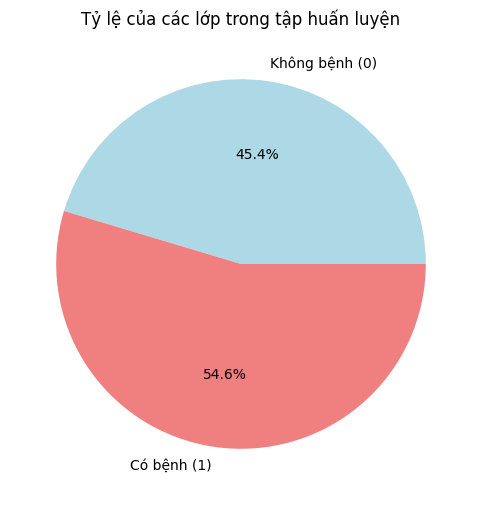

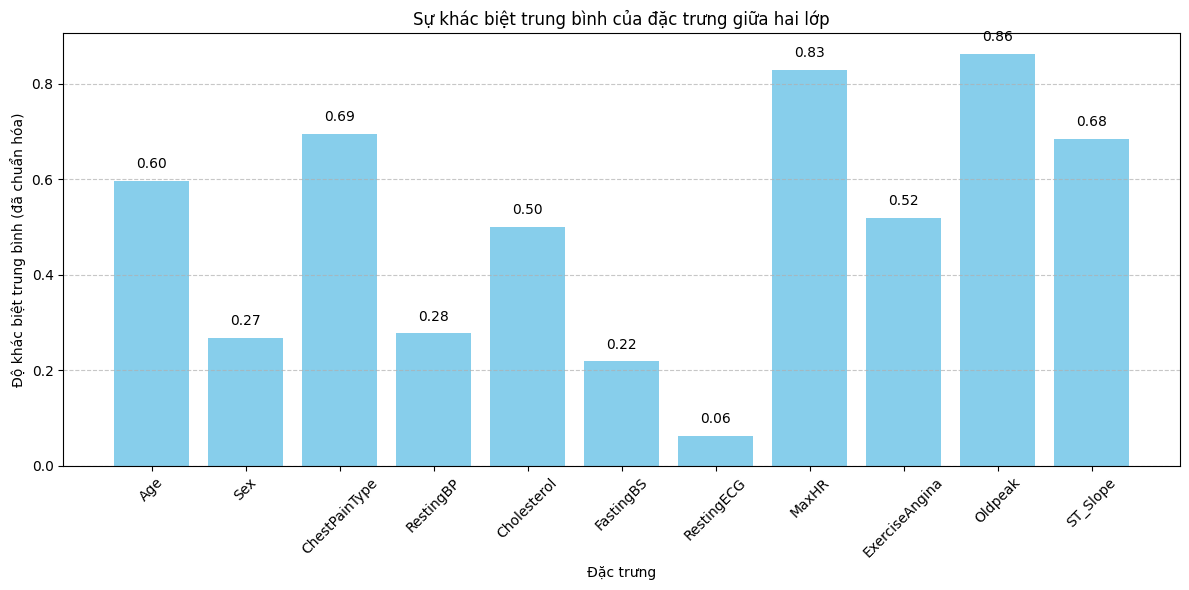

In [15]:
# Khởi tạo và huấn luyện mô hình
model = GaussianNB()
print("Đang huấn luyện mô hình Naive Bayes...")
model.fit(X_train, y_train)

# Hiển thị thông tin cơ bản
display(HTML("<h3 style='color:blue;'>Mô hình Naive Bayes đã được huấn luyện!</h3>"))
display(HTML(f"<p><b>Số lớp:</b> {len(model.classes_)}</p>"))
display(HTML(f"<p><b>Số đặc trưng:</b> {model.n_features_in_}</p>"))
display(HTML(f"<p><b>Tên đặc trưng:</b> {', '.join(X_train.columns)}</p>"))

# Trực quan hóa tỷ lệ lớp (Class Prior) bằng biểu đồ bánh
class_prior = model.class_prior_
labels = ['Không bệnh (0)', 'Có bệnh (1)']
plt.figure(figsize=(6, 6))
plt.pie(class_prior, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Tỷ lệ của các lớp trong tập huấn luyện')
plt.show()

# Trực quan hóa sự khác biệt trung bình của đặc trưng giữa hai lớp
means = model.theta_  # Trung bình của các đặc trưng cho mỗi lớp
diff_means = np.abs(means[1] - means[0])  # Sự khác biệt tuyệt đối giữa trung bình của lớp 1 và lớp 0
feature_names = X_train.columns

plt.figure(figsize=(12, 6))
plt.bar(feature_names, diff_means, color='skyblue')
plt.title('Sự khác biệt trung bình của đặc trưng giữa hai lớp')
plt.xlabel('Đặc trưng')
plt.ylabel('Độ khác biệt trung bình (đã chuẩn hóa)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(diff_means):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

Độ chính xác: 0.842391304347826


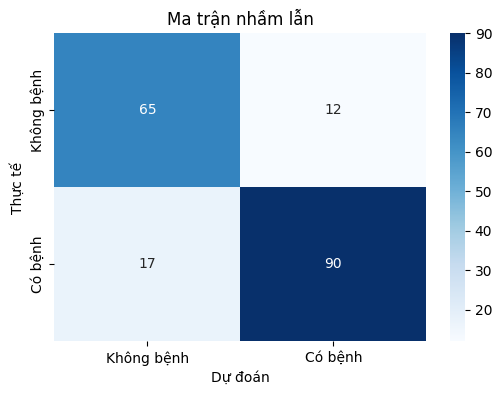


Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



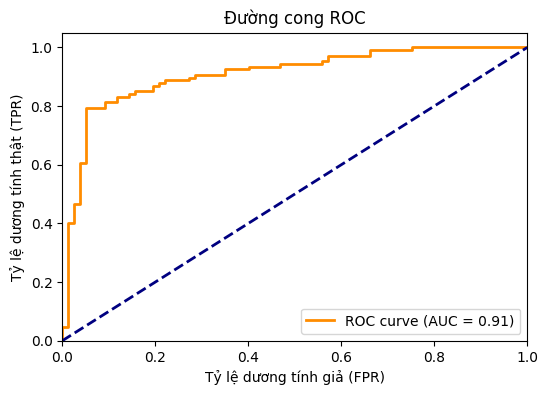

In [13]:
y_pred = model.predict(X_test)
print("Độ chính xác:", accuracy_score(y_test, y_pred))

# Ma trận nhầm lẫn dưới dạng heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Không bệnh', 'Có bệnh'], yticklabels=['Không bệnh', 'Có bệnh'])
plt.title('Ma trận nhầm lẫn')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

# Báo cáo phân loại
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

# ROC Curve và AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tỷ lệ dương tính giả (FPR)')
plt.ylabel('Tỷ lệ dương tính thật (TPR)')
plt.title('Đường cong ROC')
plt.legend(loc='lower right')
plt.show()

In [17]:
# Mẫu thử: Một bệnh nhân giả định
sample = pd.DataFrame({
    'Age': [50],              # Tuổi
    'Sex': ['M'],             # Giới tính: M (Nam)
    'ChestPainType': ['ASY'], # Loại đau ngực: ASY
    'RestingBP': [140],       # Huyết áp nghỉ
    'Cholesterol': [250],     # Cholesterol
    'FastingBS': [0],         # Đường huyết lúc đói
    'RestingECG': ['Normal'], # Điện tâm đồ nghỉ
    'MaxHR': [150],           # Nhịp tim tối đa
    'ExerciseAngina': ['Y'],  # Đau thắt ngực khi tập
    'Oldpeak': [1.5],         # Độ dốc ST
    'ST_Slope': ['Flat']      # Độ nghiêng đoạn ST
})

# Mã hóa biến phân loại cho mẫu thử
for col in categorical_cols:
    sample[col] = le.fit_transform(sample[col])

# Chuẩn hóa đặc trưng số cho mẫu thử
sample[numeric_cols] = scaler.transform(sample[numeric_cols])

# Dự đoán
prediction = model.predict(sample)
print("\nDự đoán cho mẫu thử:", "Có bệnh tim" if prediction[0] == 1 else "Không có bệnh tim")


Dự đoán cho mẫu thử: Không có bệnh tim
